<a href="https://colab.research.google.com/github/KimaniKibuthu/100-Days-Of-Code/blob/main/Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoInland Vehicle Insurance Claim Challenge

## Introduction

When providing insurance, there are very few points of contact between customers and the insurance provider. Because of this, AutoInland (an Insurance company in west Africa with a focus on Auto Insurance) needs to make every point of contact count; one of the most valuable of these is filing and settlement of claims.

AutoInland believes that to achieve better service level standards, they need to anticipate future demands in terms of claims request volume. This will allow them to better manage their resources while keeping the customer experience positive and the levels of satisfaction high.

The objective of this hackathon is to develop a predictive model that determines if a customer will submit a vehicle insurance claim in the next three months. This solution will help streamline financial planning at AutoInland and allow them to better serve their customers by understanding which customers are likely to submit a claim.

## Methodology
1. Getting Data
2. Cleaning and Exploring Data
3. Feature engineering
4. Modelling

# Libraries and Variables

## Libraries

In [5]:
! pip install catboost

In [6]:
# General libraries
import os
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling Libraries

from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import classification_report, f1_score

# Get Data

In [7]:
from google.colab import files
files.upload()

Saving SampleSubmission (2).csv to SampleSubmission (2).csv
Saving Test (2).csv to Test (2).csv
Saving Train (7).csv to Train (7).csv
Saving VariableDefinitions.csv to VariableDefinitions.csv


{'SampleSubmission (2).csv': b'ID,target\nID_01QM0NU,0\nID_024NJLZ,0\nID_02NOVWQ,0\nID_02VSP68,0\nID_02YB37K,0\nID_04OFD80,0\nID_04UA1UO,0\nID_06QWOUO,0\nID_06SOU7C,0\nID_0CRE393,0\nID_0D598MI,0\nID_0EUIYTC,0\nID_0FBQCMF,0\nID_0G32KK0,0\nID_0G8LN29,0\nID_0HZ0SGK,0\nID_0IEWNLE,0\nID_0IG9TFC,0\nID_0J11QD0,0\nID_0KI5LO5,0\nID_0KIV90L,0\nID_0MOXT38,0\nID_0N6C2N6,0\nID_0NJQCGC,0\nID_0OY6BWD,0\nID_0P00KVT,0\nID_0PAPPE2,0\nID_0PX089J,0\nID_0SJ3H22,0\nID_0U1TI1O,0\nID_0VSJD2V,0\nID_0VW4ENS,0\nID_0WI1PKC,0\nID_0XBP65Y,0\nID_0XWTUD1,0\nID_0XYBQSZ,0\nID_0YY2WTH,0\nID_0Z10C2X,0\nID_113L0WC,0\nID_12LAA0M,0\nID_14E64YO,0\nID_14PTJAR,0\nID_15E6VNK,0\nID_18GG600,0\nID_18YKWD3,0\nID_19Y74F3,0\nID_1A892BZ,0\nID_1BB9A3U,0\nID_1BHINKZ,0\nID_1CE0FXA,0\nID_1DGETB8,0\nID_1DY15LV,0\nID_1F7S4BX,0\nID_1FON9ZU,0\nID_1FONKDO,0\nID_1GJMKH8,0\nID_1GORHQO,0\nID_1MHPLTV,0\nID_1O6QEW2,0\nID_1OIPLKX,0\nID_1QAE16E,0\nID_1QQW9CU,0\nID_1RR0Y6C,0\nID_1RZN8I3,0\nID_1UON1RT,0\nID_1VP88Q5,0\nID_1WLRCU0,0\nID_1YRBDWT,0\nID_1YW

In [8]:
# Save to variables
train = pd.read_csv('/content/Train (7).csv')
test = pd.read_csv('/content/Test (2).csv')
submission = pd.read_csv('/content/SampleSubmission (2).csv')
definitions = pd.read_csv('/content/VariableDefinitions.csv')

# Clean, Create and Explore Data
Clean the data, explore it and ready the data for modelling

## General Exploration

In [9]:
# Sample of the data
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [10]:
# Definitions
definitions

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [11]:
# Check for info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [12]:
# Check for missing values
train.isnull().sum()/ len(train)

ID                        0.000000
Policy Start Date         0.000000
Policy End Date           0.000000
Gender                    0.029721
Age                       0.000000
First Transaction Date    0.000000
No_Pol                    0.000000
Car_Category              0.309463
Subject_Car_Colour        0.576372
Subject_Car_Make          0.204984
LGA_Name                  0.536137
State                     0.537131
ProductName               0.000000
target                    0.000000
dtype: float64

In [13]:
train.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [14]:
# Rename Columns
train.rename(columns={
    'ID': 'ID',
    'Policy Start Date': 'policy_start_date',
     'Policy End Date':'policy_end_date',
     'Gender':'gender', 
     'Age': 'age',
      'First Transaction Date': 'initial_transaction_date', 
      'No_Pol': 'policies_total', 
      'Car_Category': 'car_type',
       'Subject_Car_Colour': 'car_color', 
       'Subject_Car_Make': 'car_make', 
       'LGA_Name': 'city', 
       'State': 'state',
       'ProductName': 'product',
        'target': 'target'
}, inplace=True)

## Policy Dates

### Clean and create

In [15]:
# Function to get year, month and policy duration

def time_column_creator(time_columns, data):
  for column in time_columns:
    year = [datetime.strptime(value, "%Y-%m-%d").year for value in data[column].values]
    month = [datetime.strptime(value, "%Y-%m-%d").month for value in data[column].values]
    time = [datetime.strptime(value, "%Y-%m-%d") for value in data[column].values]

    data[f'year_{column}'] = year
    data[f'month_{column}'] = month
    data[f'time_{column}'] = time
    
  duration = (data[f'time_{time_columns[1]}'] - data[f'time_{time_columns[0]}'])
  duration_in_days = [int(value / 8.64e+13) for value in duration.values]
  data['duration'] = duration_in_days

  return data 



In [16]:
train.columns

Index(['ID', 'policy_start_date', 'policy_end_date', 'gender', 'age',
       'initial_transaction_date', 'policies_total', 'car_type', 'car_color',
       'car_make', 'city', 'state', 'product', 'target'],
      dtype='object')

In [17]:
# Create Columns
columns = ['policy_start_date', 'policy_end_date']

train_with_time = time_column_creator(columns, train)

In [18]:
# Check for similarity between start date and initial policy payment
start = train_with_time['policy_start_date'].values
initial = train_with_time['initial_transaction_date'].values

set(start) == set(initial)

True

In [19]:
# Duration
train_with_time['duration'] = round(train_with_time['duration']/364, 1)
train_with_time['duration'].unique()

array([ 1. ,  0.3,  0.9,  0.5,  0.6,  0.8,  0.7,  0.4,  0.2,  2. ,  0.1,
        0. , 30.6, 30.5,  1.1,  1.4,  7.4, 10.2,  1.2, 10. ,  6.2,  1.5,
        8. ,  9. ,  5.1])

In [20]:
train_with_time['duration'].value_counts()

1.0     10572
0.5       446
0.9       230
0.8       176
0.2       162
0.7       157
0.3       129
0.6        87
0.4        57
0.1        33
1.4         5
0.0         5
2.0         4
1.2         2
30.5        2
1.1         2
30.6        2
10.0        1
5.1         1
10.2        1
1.5         1
8.0         1
6.2         1
9.0         1
7.4         1
Name: duration, dtype: int64

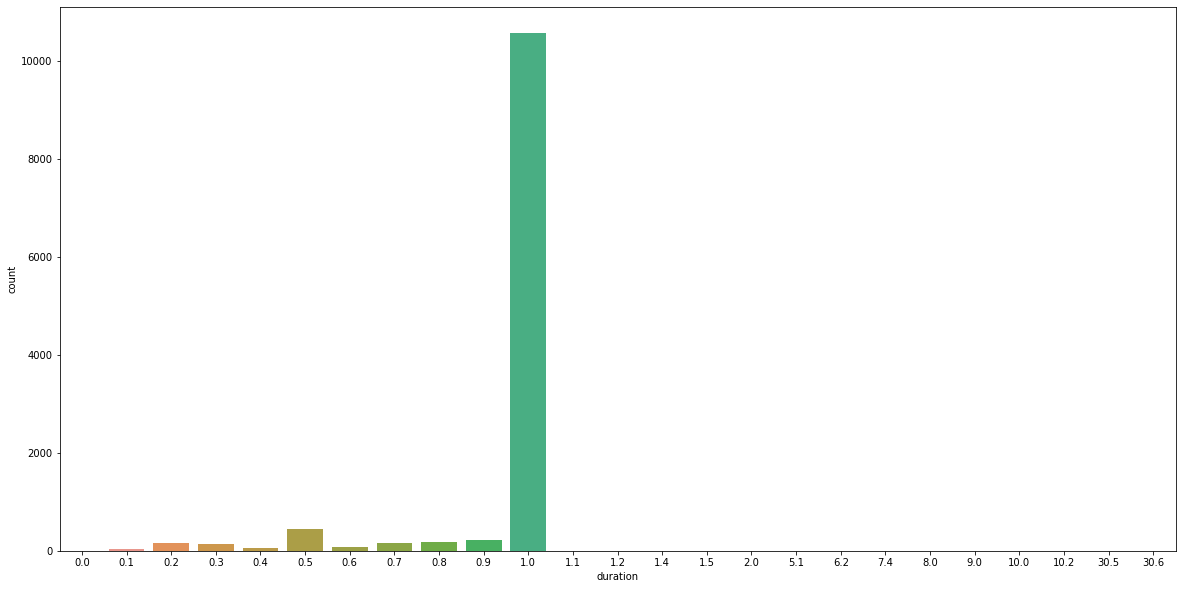

In [21]:
# Duration
plt.figure(figsize=(20, 10))
sns.countplot(x=train_with_time['duration'])

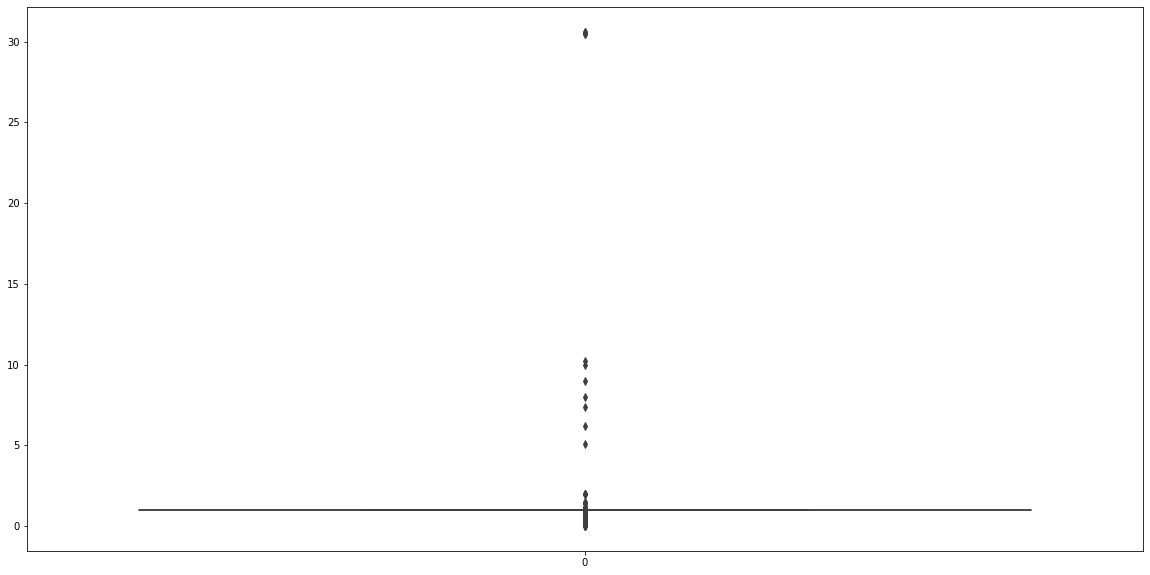

In [22]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_with_time['duration'])

There seems to be outliers. 

In [23]:
# Explore more
train_with_time.loc[train_with_time['duration'] > 1]

,ID,policy_start_date,policy_end_date,gender,age,initial_transaction_date,policies_total,car_type,car_color,car_make,city,state,product,target,year_policy_start_date,month_policy_start_date,time_policy_start_date,year_policy_end_date,month_policy_end_date,time_policy_end_date,duration
233,ID_0QL0WDA,2010-01-02,2012-01-01,Male,51,2010-01-02,2,NaN,NaN,NaN,NaN,NaN,Motor Cycle,0,2010,1,2010-01-02,2012,1,2012-01-01,2.0
685,ID_2484F7U,2010-10-19,2041-04-18,Male,36,2010-10-19,1,Saloon,NaN,TOYOTA,NaN,NaN,CarFlex,0,2010,10,2010-10-19,2041,4,2041-04-18,30.6
885,ID_2QAR811,2010-01-21,2012-01-20,Entity,120,2010-01-21,2,NaN,NaN,NaN,Victoria Island,Lagos,CVTP,0,2010,1,2010-01-21,2012,1,2012-01-20,2.0
912,ID_2SWIGKH,2007-03-04,2037-08-03,Male,37,2007-03-04,1,Saloon,Gold,TOYOTA,Bekwara,Benue,CarSafe,0,2007,3,2007-03-04,2037,8,2037-08-03,30.5
1243,ID_3S86LZR,2010-08-07,2011-09-02,Male,37,2010-08-07,3,NaN,NaN,NaN,Kaduna North,Kaduna-North,Car Classic,0,2010,8,2010-08-07,2011,9,2011-09-02,1.1
1348,ID_448AUF2,2010-01-01,2011-05-31,Entity,93,2010-01-01,7,NaN,NaN,Honda,Lagos Island,Lagos,CarSafe,0,2010,1,2010-01-01,2011,5,2011-05-31,1.4
2076,ID_6BJMPUY,2009-02-26,2016-06-25,Male,37,2009-02-26,1,Saloon,Black,TOYOTA,Argungu,Kebbi,Car Classic,0,2009,2,2009-02-26,2016,6,2016-06-25,7.4
3389,ID_9ZVJVT3,2009-09-13,2011-09-12,Male,62,2009-09-13,2,JEEP,Black,TOYOTA,Surulere,Lagos,Car Classic,0,2009,9,2009-09-13,2011,9,2011-09-12,2.0
4442,ID_DC8ITK4,2006-07-06,2016-09-06,Male,39,2006-07-06,3,Saloon,NaN,TOYOTA,Eti-Osa,Eti-Osa,Car Vintage,0,2006,7,2006-07-06,2016,9,2016-09-06,10.2
6239,ID_INECD1O,2009-08-29,2011-01-17,Male,31,2009-08-29,1,Saloon,Red,TOYOTA,Abuja,Abuja,Car Classic,0,2009,8,2009-08-29,2011,1,2011-01-17,1.4


In [24]:
# Drop outliers
train_with_time = train_with_time[train_with_time['duration'].between(0.1, 2)]

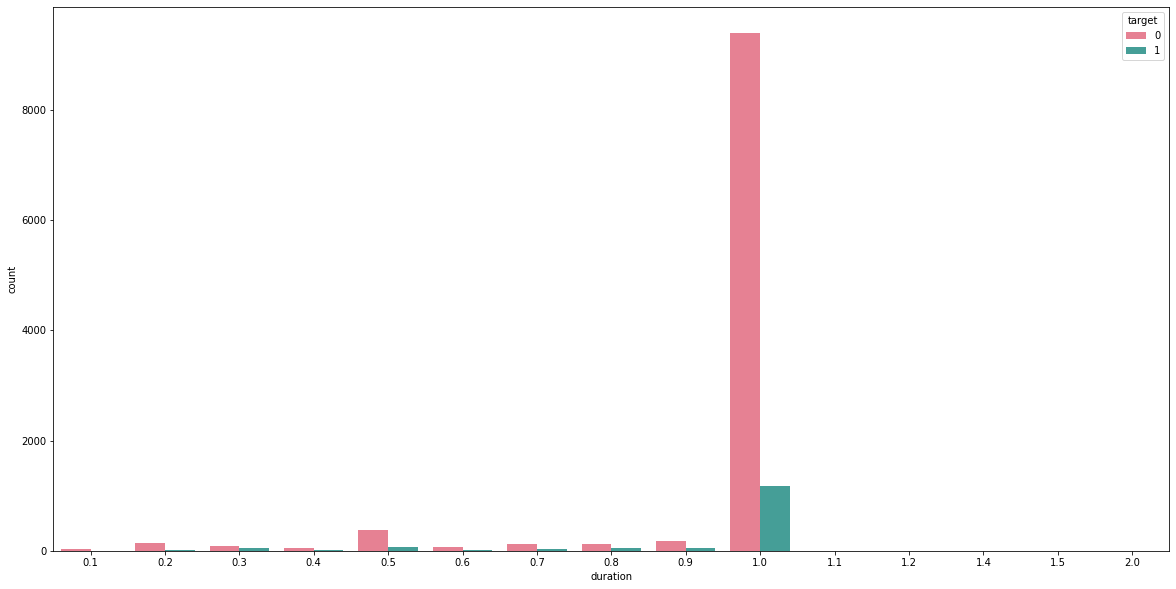

In [25]:
# Duration
plt.figure(figsize=(20, 10))
sns.countplot(x = 'duration', hue='target', data=train_with_time, palette='husl')

There is no real correlation between collecting claims and duration

## Gender



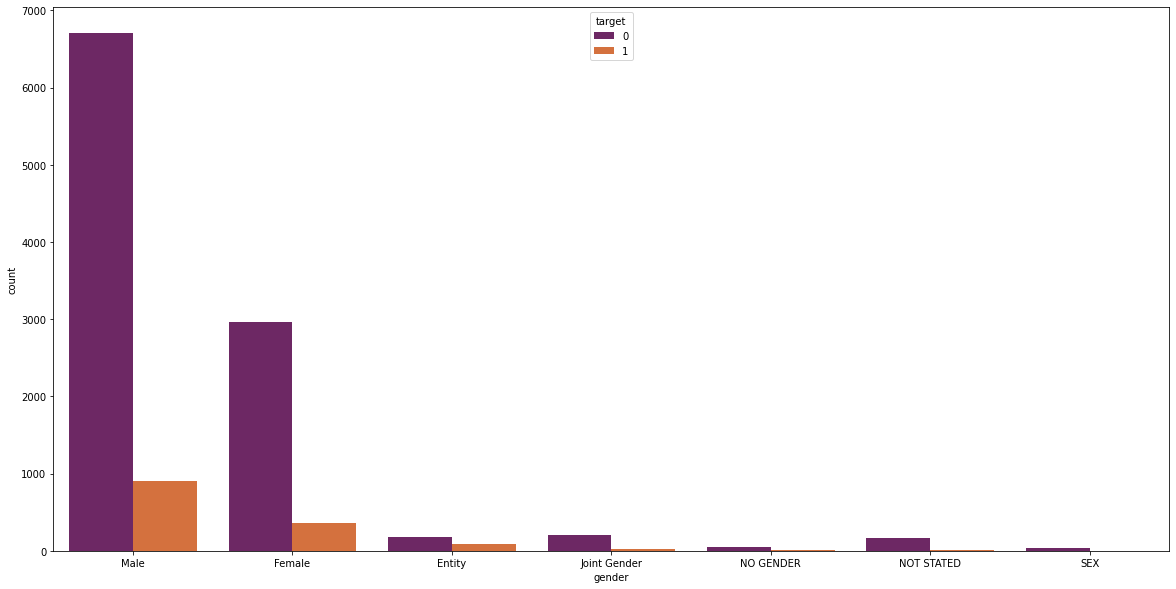

In [26]:
# Gender
plt.figure(figsize=(20, 10))
sns.countplot(x = 'gender', hue='target', data=train_with_time, palette='inferno')

In [27]:
# Fill null values 

train_with_time['gender'].fillna('NOT STATED', inplace=True)

# Keep only male and female. Name the rest as Other
train_with_time.loc[(train_with_time['gender'] != 'Male') & (train_with_time['gender'] != 'Female'), 'gender' ] = 'Other'


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [28]:
train_with_time['gender'].value_counts()

Male      7608
Female    3325
Other     1130
Name: gender, dtype: int64

## Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


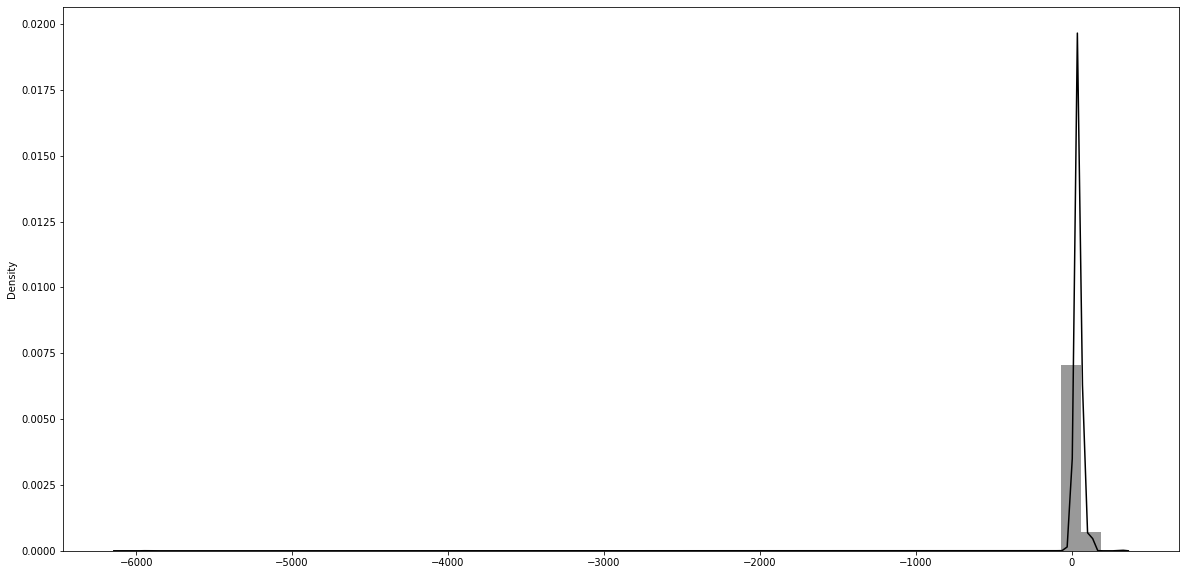

In [29]:
# Age
plt.figure(figsize=(20, 10))
sns.distplot(x = train_with_time['age'], color= 'k')

In [30]:
# min age
np.mean(train_with_time['age'])

42.2399071541076

In [31]:
# Drop outliers
train_age = train_with_time[train_with_time['age'].between(18, 80)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


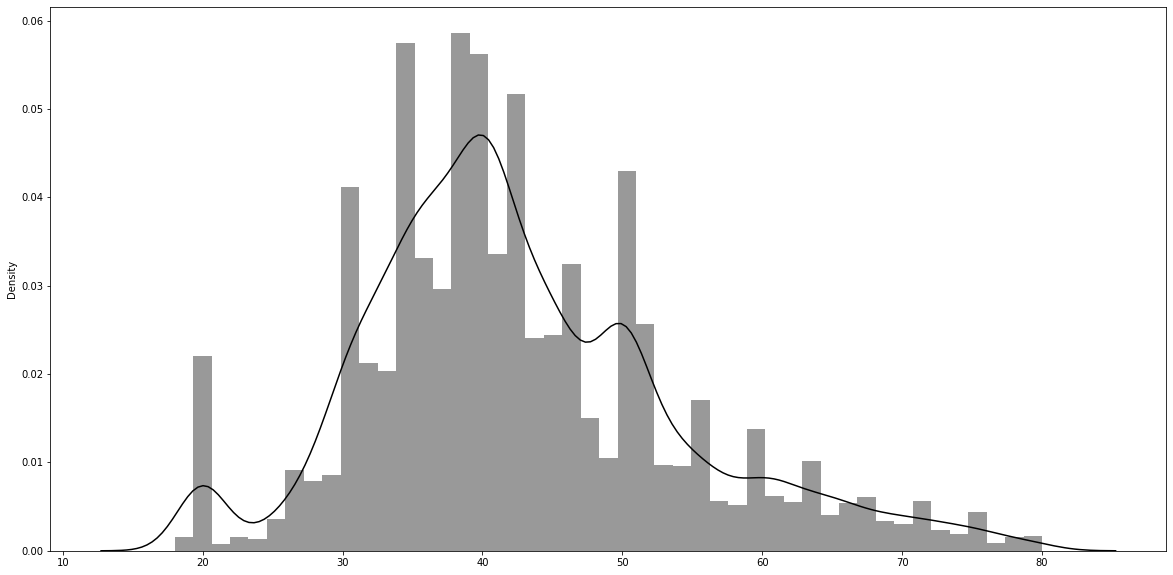

In [32]:
# Age
plt.figure(figsize=(20, 10))
sns.distplot(x = train_age['age'], color= 'k')

In [33]:
# Let's bin age
train_age['age_bin'] = pd.cut(train_age['age'], bins=list(range(10,80,10))).astype(str)

# Uppermost bin
train_age.loc[train_age['age_bin'] == 'nan', 'age_bin'] = '[70+]'

# Adjust bin so the sorting is correct
#train_age.loc[train_age['age_bin'] == '(5, 10]', 'age_bin'] = '(05, 10]'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


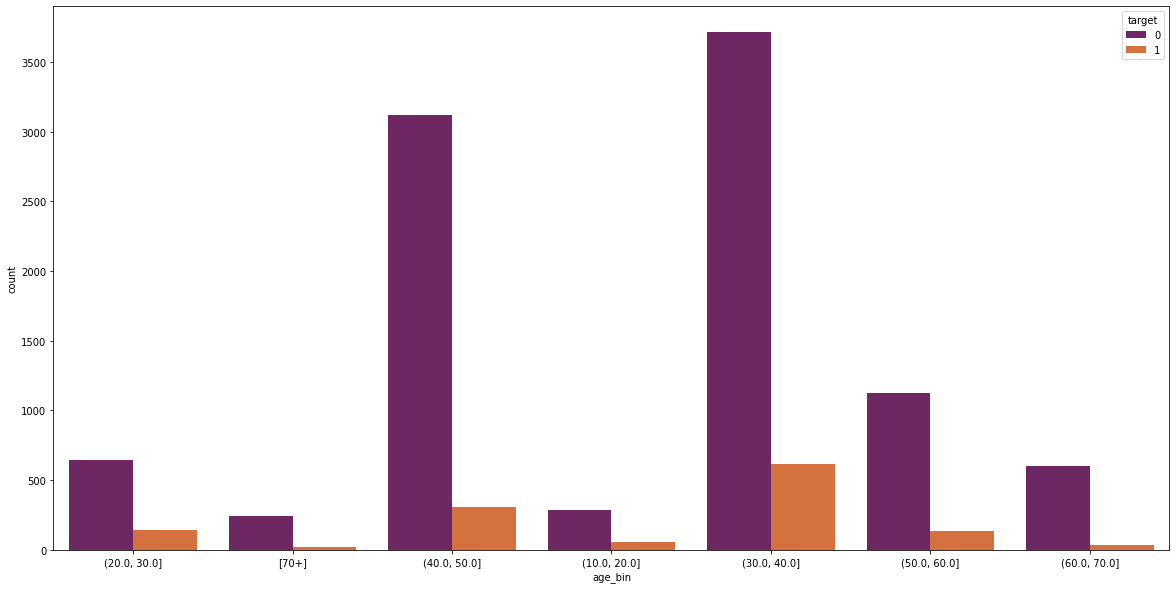

In [34]:
# Age
plt.figure(figsize=(20, 10))
sns.countplot(x = 'age_bin', hue='target', data=train_age, palette= 'inferno')

## Number of Policies

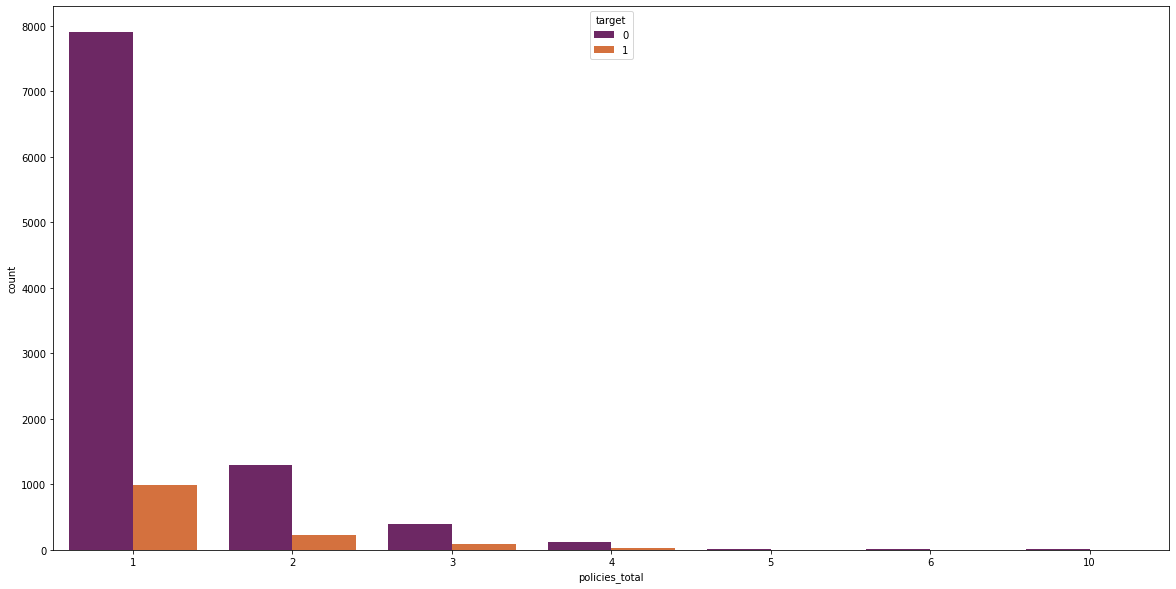

In [35]:
# Policies
plt.figure(figsize=(20, 10))
sns.countplot(x = 'policies_total', hue='target', data=train_age, palette= 'inferno')

The more the policies the less the claims

## Car

### Car make

In [36]:
# car make
train_age['car_make'].unique()

array(['TOYOTA', nan, 'REXTON', 'Lexus', 'Iveco', 'DAF', 'Honda',
       'Mercedes', 'ACURA', 'Ford', 'Volkswagen', 'Nissan', 'Hyundai',
       'Pontiac', '.', 'Range Rover', 'Kia', 'Mitsubishi', 'Scania',
       'BMW', 'Infiniti', 'Renault', 'Volvo', 'Mack', 'Grand Cherokee',
       'Porsche', 'Peugeot', 'Land Rover', 'Mazda', 'Jeep', 'Audi',
       'Suzuki', 'MINI COOPER', 'Chevrolet', 'KA', 'As Attached',
       'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler', 'Dodge',
       'Hummer', 'GMC', 'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel',
       'Motorcycle', 'ZOYTE', 'Man', 'Seat', 'Lincoln', 'Rols Royce',
       'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black', 'Ashok Leyland',
       'FOTON', 'Geely', 'Raston', 'MG', 'BRILLIANCE', 'Buik'],
      dtype=object)

In [37]:
# car make
train_age['car_make'].value_counts()

TOYOTA            4614
Honda              970
Lexus              566
Mercedes           465
Hyundai            393
                  ... 
Grand Cherokee       1
REXTON               1
MG                   1
KA                   1
FOTON                1
Name: car_make, Length: 66, dtype: int64

In [38]:
train_age.loc[(train_age['car_make'] !='TOYOTA') & (train_age['car_make'] !='Honda') & (train_age['car_make'] !='Lexus') & (train_age['car_make'] !='Mercedes') & (train_age['car_make'] !='Hyundai'), 'car_make' ] = 'Other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Car Type

In [39]:
# Car type
train_age['car_type'].unique()

array(['Saloon', 'JEEP', nan, 'Truck', 'Bus', 'Motorcycle', 'Mini Bus',
       'Mini Van', 'Van', 'Pick Up', 'Pick Up > 3 Tons', 'CAMRY CAR HIRE',
       'Wagon', 'Shape Of Vehicle Chasis', 'Sedan', 'Station 4 Wheel',
       'Tipper Truck'], dtype=object)

In [40]:
train_age.loc[(train_age['car_type'] =='Sedan') , 'car_type' ] = 'Saloon'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [41]:
train_age.loc[(train_age['car_type'] !='Saloon') & (train_age['car_type'] !='Truck') & (train_age['car_type'] !='Bus') & (train_age['car_type'] !='Motorcycle') & (train_age['car_type'] !='Pick Up')& (train_age['car_type'] !='Van'), 'car_type' ] = 'Other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Car Color

In [42]:
# Car color
train_age['car_color'].unique()

array(['Black', 'Grey', 'Red', nan, 'Blue', 'Silver', 'As Attached',
       'Green', 'Ash', 'White', 'Gray & Gray', 'Wine', 'Brown',
       'Red & Blue', 'Gold', 'Gray & Silver', 'Orange', 'Dark Grey',
       'White & Red', 'Light Green', 'Dark Gray', 'B.Silver', 'Purple',
       'Red & Yellow', 'Yellow', 'Red & White', 'D. Red', 'Dark Red',
       'Black & White', 'White & Blue', 'Cream', 'Dark Green',
       'Red & Black', 'D. Gold', 'Champagne', 'Light Blue',
       'Blue&White&Red', 'White & Yellow', 'Dark Blue', 'Black & Orange',
       'Burgundy', 'Yellow & White', 'Beige Mitalic', 'Light Gray',
       'Blue Sky'], dtype=object)

In [43]:
# Car color
train_age['car_color'].value_counts()

Black             1748
Silver             523
Grey               483
As Attached        411
Blue               326
White              253
Red                232
Green              223
Gold               165
Ash                125
Wine                89
Brown               53
Cream                8
Yellow               7
Red & White          4
Orange               4
Dark Gray            4
White & Blue         3
D. Red               3
Purple               3
Light Green          3
Dark Grey            2
White & Red          2
Gray & Silver        2
Black & White        2
Black & Orange       2
B.Silver             2
Gray & Gray          2
Beige Mitalic        1
Blue&White&Red       1
D. Gold              1
Light Blue           1
Red & Blue           1
Dark Red             1
Red & Yellow         1
Champagne            1
Blue Sky             1
Yellow & White       1
Dark Green           1
Dark Blue            1
White & Yellow       1
Red & Black          1
Burgundy             1
Light Gray 

In [44]:
train_age.loc[(train_age['car_color'] !='Black') & (train_age['car_color'] !='Silver') & (train_age['car_color'] !='Grey') & (train_age['car_color'] !='Blue') & (train_age['car_color'] !='White'), 'car_color' ] = 'Other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [45]:
# Car color
train_age['car_color'].value_counts()

Other     7725
Black     1748
Silver     523
Grey       483
Blue       326
White      253
Name: car_color, dtype: int64

### Visualize

[Text(0, 0, 'Black'),
 Text(0, 0, 'Grey'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Blue'),
 Text(0, 0, 'Silver'),
 Text(0, 0, 'White')]

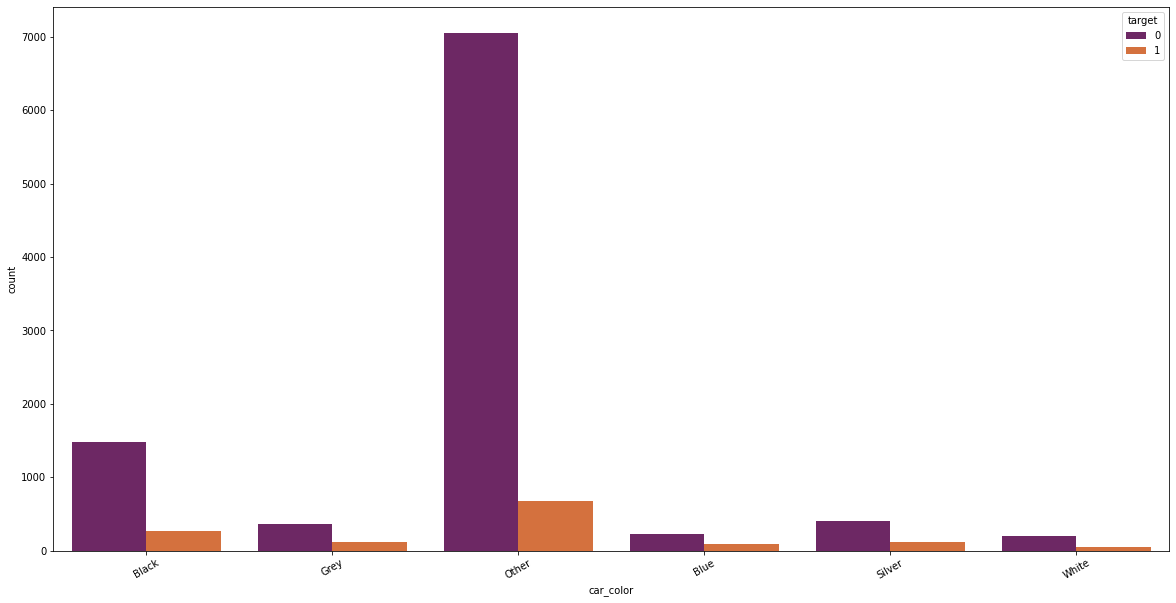

In [46]:
# Car color
plt.figure(figsize=(20, 10))
sns.countplot(x = 'car_color', hue='target', 
              data=train_age,
              palette= 'inferno').set_xticklabels(rotation=30, 
                                                  labels=train_age['car_color'].unique() )

[Text(0, 0, 'Saloon'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Truck'),
 Text(0, 0, 'Bus'),
 Text(0, 0, 'Motorcycle'),
 Text(0, 0, 'Van'),
 Text(0, 0, 'Pick Up')]

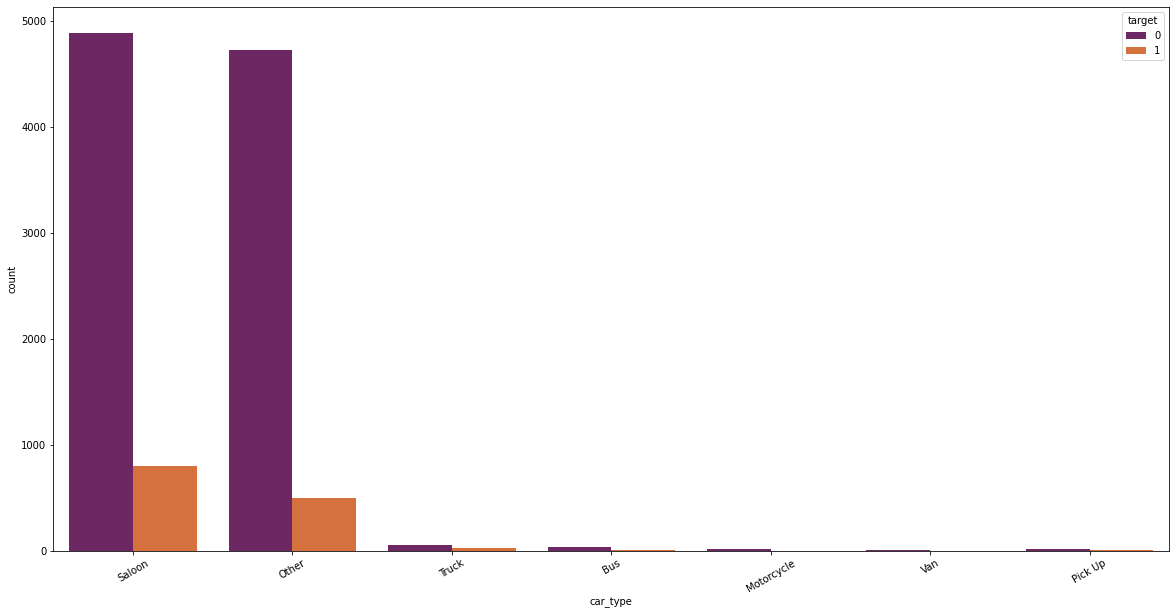

In [47]:
# car type
plt.figure(figsize=(20, 10))
sns.countplot(x = 'car_type', hue='target', 
              data=train_age,
              palette= 'inferno').set_xticklabels(rotation=30, 
                                                  labels=train_age['car_type'].unique() )

[Text(0, 0, 'TOYOTA'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Lexus'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Mercedes'),
 Text(0, 0, 'Hyundai')]

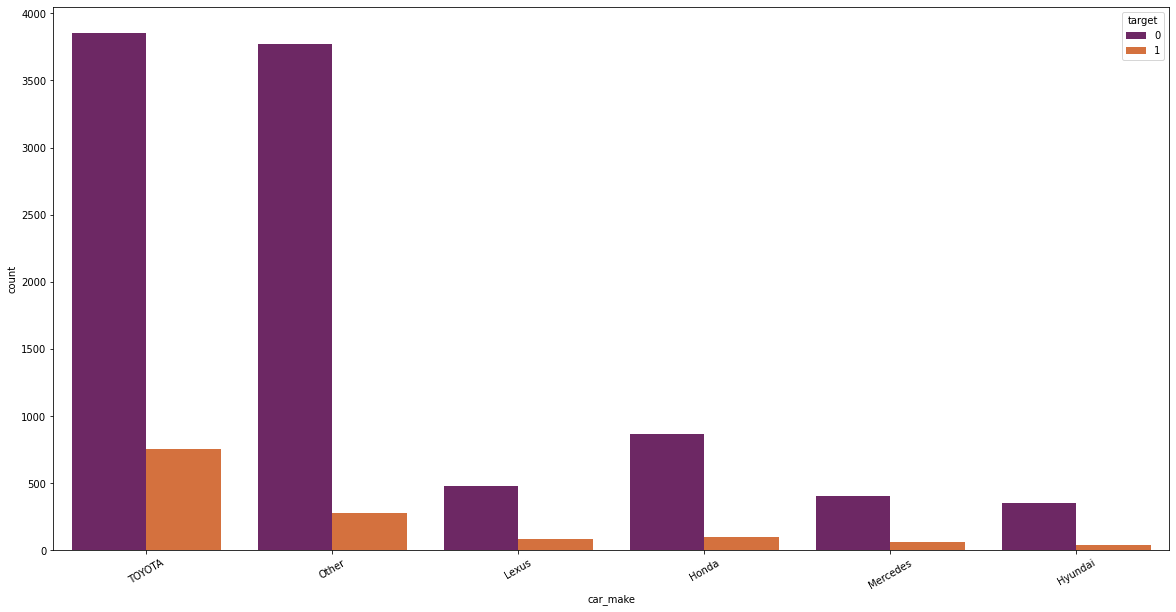

In [48]:
# Car make

plt.figure(figsize=(20, 10))
sns.countplot(x = 'car_make', hue='target', 
              data=train_age,
              palette= 'inferno').set_xticklabels(rotation=30, 
                                                  labels=train_age['car_make'].unique() )

## City and State

In [49]:
# City
train_age['city'].value_counts()

Victoria Island    817
Ikeja              384
Surulere           275
Eti-Osa            214
Lagos Mainland     210
                  ... 
Kuje                 1
Ughelli North        1
Ethiope East         1
BARIGA               1
EMENE                1
Name: city, Length: 252, dtype: int64

In [50]:
# City
train_age['city'].unique()

array([nan, 'Lagos', 'Ikeja', 'Badagry', 'Eti-Osa', 'Victoria Island',
       'Lagos Mainland', 'Abeokuta', 'Abuja Municipal', 'Yaba', 'Aguda',
       'Surulere', 'Oshodi-Isolo', 'Alimosho', 'Okpe, Delta State',
       'Asaba', 'IbadanCentral', 'Lekki', 'Ibeju/Lekki', 'OBANIKORO',
       'Agege', 'ISHERI', 'Kosofe', 'OGUN', 'Apapa', 'Ibadan South West',
       'Obia/Akpor', 'Ibadan South East', 'Sapele', 'Kaduna South',
       'Ikorodu', 'Amuwo-Odofin', 'Awka', 'GBAGADA', 'Port Harcourt',
       'Minna', 'Shomolu', 'Benin', 'Lagos Island', 'Central',
       'Ebute-Metta', 'Ketu', 'Uyo', 'Mushin', 'Katagum', 'ENUGU EAST',
       'Oredo', 'Festac', 'Ipaja', 'Zaria ', 'Esan West', 'Oluyole',
       'Bwari', 'Obafemi-Owode', 'LGA', 'Orile-Iganmu', 'Egbeda', 'Abuja',
       'Ido', 'Oguta', 'Jos North', 'Ikoyi', 'Ajah', 'Ondo West',
       'Kaduna North', 'Warri', 'Aniocha South', 'Owerri', 'Awka South',
       'Asokoro District', 'Ile-Oluji', 'Port-Harcourt', 'Ifako-Ijaye ',
       'Oshodi'

In [51]:
# State
train_age['state'].value_counts()

Lagos              2677
Benue               600
Eti-Osa             214
Abuja-Municipal     187
Ibeju-Lekki         119
                   ... 
Ijebu-North           1
QuaAn-Pan             1
Asari-Toru            1
Nasarawa              1
Oshimili-North        1
Name: state, Length: 110, dtype: int64

In [52]:
# State
train_age['state'].unique()

array([nan, 'Lagos', 'Benue', 'Eti-Osa', 'Ogun', 'Abuja-Municipal',
       'Oshodi-Isolo', 'Delta', 'Ibeju-Lekki', 'Ibadan-West',
       'Obia-Akpor', 'Ibadan-East', 'Kaduna-South', 'Amuwo-Odofin',
       'Anambra', 'Rivers', 'Niger-State', 'Edo', 'Akwa-Ibom',
       'ENUGU-EAST', 'Kaduna', 'Esan-West', 'Obafemi-Owode',
       'Orile-Iganmu', 'Abuja', 'Imo', 'Jos-North', 'Ondo-West',
       'Kaduna-North', 'Aniocha-South', 'Awka-South', 'Ile-Oluji',
       'Port-Harcourt', 'Ifako-Ijaye', 'Nnewi-North', 'Aboh-Mbaise',
       'Oyo', 'Akoko-West', 'Warri-Central', 'Cross-River', 'Jos-South',
       'Onitsha-North', 'Osun', 'Ajeromi-Ifelodun', 'Kano-Municipal',
       'Ife-Central', 'Ilorin-West', 'Lagelu-North', 'Owerri-Municipal',
       'Nsit-Ubium', 'Udi-Agwu', 'Essien-Udim', 'Owerri-West', 'Ondo',
       'Ogbmosho-South', 'Umuahia-South', 'ABULE-EGBA', 'Enugu-North',
       'Ovia-SouthWest', 'Ajegunle-State', 'Ekiti-West', 'Ogun-Waterside',
       'Ife-North', 'Ijebu-Ode', 'Anambra-Ea

## Product Name

In [53]:
# Product
train_age['product'].value_counts()

Car Classic         6122
CarSafe             3488
Car Plus             464
Customized Motor     422
CVTP                 321
CarFlex              173
Muuve                 37
Motor Cycle           30
Car Vintage            1
Name: product, dtype: int64

In [54]:
# Check for null
train_age['product'].isnull().sum()

0

[Text(0, 0, 'Car Classic'),
 Text(0, 0, 'Muuve'),
 Text(0, 0, 'CVTP'),
 Text(0, 0, 'CarSafe'),
 Text(0, 0, 'Car Plus'),
 Text(0, 0, 'Customized Motor'),
 Text(0, 0, 'Motor Cycle'),
 Text(0, 0, 'CarFlex'),
 Text(0, 0, 'Car Vintage')]

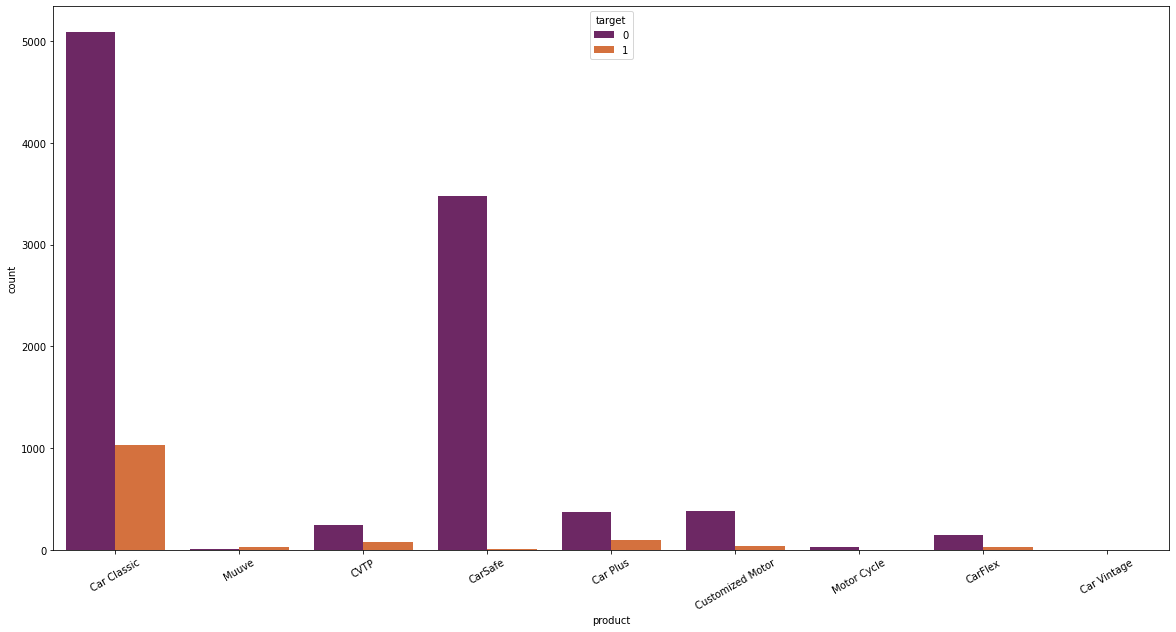

In [55]:
# product
plt.figure(figsize=(20, 10))
sns.countplot(x = 'product', hue='target', 
              data=train_age,
              palette= 'inferno').set_xticklabels(rotation=30, 
                                                  labels=train_age['product'].unique() )

Car safe had very few claims

## Target

In [56]:
# target
train_age['target'].value_counts()

0    9735
1    1323
Name: target, dtype: int64

The data is imbalanced. Hence we shall have to handle that

## Prepare data for modelling

In [57]:
train_age.columns

Index(['ID', 'policy_start_date', 'policy_end_date', 'gender', 'age',
       'initial_transaction_date', 'policies_total', 'car_type', 'car_color',
       'car_make', 'city', 'state', 'product', 'target',
       'year_policy_start_date', 'month_policy_start_date',
       'time_policy_start_date', 'year_policy_end_date',
       'month_policy_end_date', 'time_policy_end_date', 'duration', 'age_bin'],
      dtype='object')

In [58]:
train_age.head()

,ID,policy_start_date,policy_end_date,gender,age,initial_transaction_date,policies_total,car_type,car_color,car_make,city,state,product,target,year_policy_start_date,month_policy_start_date,time_policy_start_date,year_policy_end_date,month_policy_end_date,time_policy_end_date,duration,age_bin
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0,2010,5,2010-05-14,2011,5,2011-05-13,1.0,"(20.0, 30.0]"
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,Other,Grey,TOYOTA,NaN,NaN,Car Classic,1,2010,11,2010-11-29,2011,11,2011-11-28,1.0,[70+]
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Other,TOYOTA,NaN,NaN,Car Classic,0,2010,3,2010-03-21,2011,3,2011-03-20,1.0,"(40.0, 50.0]"
4,ID_00BRP63,2010-08-29,2010-12-31,Other,20,2010-08-29,3,Other,Other,Other,Lagos,Lagos,Muuve,1,2010,8,2010-08-29,2010,12,2010-12-31,0.3,"(10.0, 20.0]"
5,ID_00D3EF6,2010-10-21,2011-10-20,Male,37,2010-10-21,2,Other,Other,Other,NaN,NaN,Car Classic,0,2010,10,2010-10-21,2011,10,2011-10-20,1.0,"(30.0, 40.0]"


In [71]:
to_use = ['gender', 'age', 'policies_total', 'car_type', 'car_color',
       'car_make', 'product', 'month_policy_start_date',
       'month_policy_end_date', 'duration', 'age_bin']

In [72]:
X = train_age[to_use]
y = train_age['target']

In [73]:
cat_columns = [x for x in X.columns if X[x].dtype == 'O']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    random_state=42,
                                                    stratify=y)

In [75]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [76]:
x_train

,gender,age,policies_total,car_type,car_color,car_make,product,month_policy_start_date,month_policy_end_date,duration,age_bin
0,Female,44,1,Other,Other,Other,Car Classic,9,5,0.7,"(40.0, 50.0]"
1,Female,41,1,Saloon,Other,Hyundai,CarSafe,3,3,1.0,"(40.0, 50.0]"
2,Male,34,2,Other,Black,Lexus,Car Classic,5,5,1.0,"(30.0, 40.0]"
3,Male,43,1,Saloon,Other,TOYOTA,CarSafe,3,3,1.0,"(40.0, 50.0]"
4,Male,44,1,Other,Other,Other,Customized Motor,9,8,0.9,"(40.0, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...
8841,Male,43,1,Saloon,Blue,TOYOTA,Car Classic,10,4,0.5,"(40.0, 50.0]"
8842,Female,31,1,Other,Other,TOYOTA,Car Classic,3,3,1.0,"(30.0, 40.0]"
8843,Female,38,2,Saloon,Other,TOYOTA,CarSafe,1,1,1.0,"(30.0, 40.0]"
8844,Male,63,1,Other,Other,Other,Car Classic,10,10,1.0,"(60.0, 70.0]"


# Modelling

In [77]:
weights = {
    0: 0.5679,
    1: 4.1791
}

In [78]:
# Instantiate the model
cat = CatBoostClassifier(cat_features=cat_columns,
                                    class_weights=weights,
                                    verbose=False, 
                                    random_seed=42)

In [79]:
# Stratify k_fold

def model_trainer(model, x, y):
  kf = StratifiedKFold(5)
  scores = []
  for idx in kf.split(x,y):
    train_idx, test_idx = idx[0], idx[1]
    x_train, y_train = x.loc[train_idx, :], y.loc[train_idx]
    x_test, y_test = x.loc[test_idx, :], y.loc[test_idx]

    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = f1_score(y_test, preds)
    scores.append(score)

  final = np.mean(scores)

  print(f'The f1 score of the model is : {final}')


In [80]:
model_trainer(cat, x_train, y_train)

The f1 score of the model is : 0.37474673221461285


In [82]:
# Train on x train

cat.fit(x_train, y_train)

preds = cat.predict(x_test)

print(f1_score(y_test, preds))

0.375
